# Pre entrega N°1 - Hector Leonardo Ferreyra
## Análisis de Ventas de Amazon: Estudio de Datos

## ABSTRACT


### Breve Descripción Temática:
El análisis se centra en comprender cómo diversos factores afectan el estado de entrega de los pedidos de Amazon. Esto incluye la influencia de la ciudad de destino, el tipo de prenda comprada y el canal de ventas utilizado. El estudio busca identificar patrones y factores críticos que puedan ser utilizados para mejorar la logística y las estrategias de ventas, proporcionando información valiosa para la optimización operativa y la mejora de la experiencia del cliente.

### Alcance:

El análisis abarcará:
- Datos de Ventas: Información sobre transacciones específicas, incluyendo detalles del estado de entrega, ciudades, tipos de prendas, y canales de ventas.
- Región Geográfica: Datos de diferentes ciudades y posibles variaciones regionales.
- Temporalidad: Análisis en diferentes períodos si los datos están disponibles.

### Usuario Final:
Los usuarios finales de este análisis podrían ser:
- Amazon: Para optimizar procesos logísticos, mejorar la satisfacción del cliente y tomar decisiones basadas en datos.
- Consumidores de Amazon: A través de una experiencia de compra mejorada y un mejor servicio de entrega.
- Equipos de Marketing y Ventas: Para ajustar estrategias de marketing y canales de ventas según los patrones identificados.

### Resumen:
#### Este proyecto se centra en el análisis exhaustivo de los datos de ventas de Amazon, examinando diversas características como:
- Estado de entrega de las ventas
- Ciudades de destino
- Tipos de prendas
- Canal de ventas

 ###  Hipótesis de interés:
#### Basándonos en un análisis preliminar del dataset, planteamos las siguientes hipótesis:
- El estado de entrega está relacionado con la ciudad de destino y el canal de ventas.
- Las ciudades pueden influir en el tipo de prendas compradas y en el estado de entrega.
- El canal de ventas tiene un impacto significativo en el estado de entrega y en el tipo de prendas adquiridas.
  
  ### Objetivos:
- Probar las hipótesis planteadas mediante análisis estadísticos y visualizaciones.
-Identificar patrones y tendencias en los datos relacionados con el estado de entrega, ciudades, tipos de prendas, y canales de ventas.
-Desarrollar un modelo predictivo para estimar el estado de entrega basado en las características de las ventas.

### Impacto:
#### Los resultados de este estudio permitirán:
-Entender mejor los factores que influyen en el estado de entrega de los pedidos en Amazon.
-Desarrollar estrategias para mejorar la logística y la satisfacción del cliente.
-Informar decisiones estratégicas sobre el enfoque de ventas y marketing en diferentes ciudades y canales.

In [117]:
# Importo librerías

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



In [118]:
# Leo el dataset

df = pd.read_csv("Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [119]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN


In [120]:
# Ver el tipo de datos de cada columna
df.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


In [121]:
df.Status.value_counts()

,count
Status,
Shipped,77815
Shipped - Delivered to Buyer,28756
Cancelled,18334
Shipped - Returned to Seller,1954
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


Objetivo: Vamos a predecir la probabilidad de que un pedido sea cancelado.
target = status

## REALIZO UN ANALISIS EXPLORATORIO DE DATOS

In [122]:
cantidad_columnas = len(df.columns)
columnas_categoricas = df.select_dtypes(include=['object', 'category']).shape[1]
columnas_numericas = df.select_dtypes(exclude=['object', 'category']).shape[1]
cantidad_filas = df.shape[0]
porcentaje_nulos_total = (df.isnull().sum().sum() / df.size) * 100
columnas_con_nulos = df.isnull().sum()[df.isnull().sum() > 0].shape[0]

In [123]:
print(f"El dataset contiene {cantidad_columnas} columnas, de las cuales {columnas_categoricas} son categóricas y {columnas_numericas} son numéricas. El dataset está compuesto por {cantidad_filas} filas. En las que encontramos {porcentaje_nulos_total:.2f}% de nulos, repartido en {columnas_con_nulos} columnas.")

El dataset contiene 21 columnas, de las cuales 14 son categóricas y 7 son numéricas. El dataset está compuesto por 128976 filas. En las que encontramos 13.42% de nulos, repartido en 9 columnas.


####  ANALIZO QUE COLUMNAS Y FILAS ELIMINAR, QUE SEAN IRRELEVANTES O SIN DATO

In [124]:
(df.isnull().sum() / len(df)) * 100

,0
index,0.000000
Order ID,0.000000
Date,0.000000
Status,0.000000
Fulfilment,0.000000
Sales Channel,0.000000
ship-service-level,0.000000
Category,0.000000
Size,0.000000
Courier Status,0.000000


Se procede a eliminar las columnas 'New' y 'Pendings' por poseer el 100% de sus valores nulos. No aporta informacion util ni al analisis de datos, ni a la prediccion del modelo ni a la interpretacion de sus resultados.

In [125]:
# Eliminar columnas con valores faltantes
df_cleaned = df.dropna(axis=1)

In [126]:
df['fulfilled-by'].value_counts()

,count
fulfilled-by,
Easy Ship,39263


In [127]:
df.drop(columns=['fulfilled-by'], inplace=True)

Se procede a eliminar la columna 'fullfilled-by' dado que sus datos no proporcionan ninguna variabilidad o información discriminativa útil para el análisis o modelado, por lo cual no puede ayudar a diferenciar entre distintas observaciones, mantenerla solo agregaría redundancia y podría aumentar innecesariamente la complejidad del modelo sin mejorar su desempeño.

In [128]:
# Verifico si las 4 columnas tienen datos nulos en simultaneo
nulos_coinciden = df[['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']].isnull().all(axis=1)
# Contar cuántas veces los nulos coinciden
nulos_coinciden_count = nulos_coinciden.sum()
# Contar cuántas veces hay un nulo en al menos una columna
nulos_totales = df[['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']].isnull().any(axis=1).sum()
# Verificar si coinciden todos
todos_coinciden = nulos_coinciden_count == nulos_totales
print(f"Los nulos coinciden en todas las columnas: {todos_coinciden}")

#Conclusion: No es posible completar esas 4 columnas entre si porque son las 4 nulas en simultaneo

Los nulos coinciden en todas las columnas: True


In [129]:
# Conslusion: No hay datos de esas 4 columnas para esos indices en el resto del df

In [130]:
# Analizo las columnas por la moda
moda_ship_city = df['ship-city'].mode()[0]
print('moda_ship_city: ',moda_ship_city)
moda_ship_state = df['ship-state'].mode()[0]
print('moda_ship_state: ',moda_ship_state)
moda_ship_postal_code = df['ship-postal-code'].mode()[0]
print('moda_ship_postal_code: ',moda_ship_postal_code)
moda_ship_country = df['ship-country'].mode()[0]
print('moda_ship_country: ',moda_ship_country)

moda_ship_city:  BENGALURU
moda_ship_state:  MAHARASHTRA
moda_ship_postal_code:  201301.0
moda_ship_country:  IN


In [131]:
# Imputo los valores nulos con la moda correspondiente
df['ship-city'].fillna(moda_ship_city, inplace=True)
df['ship-state'].fillna(moda_ship_state, inplace=True)
df['ship-postal-code'].fillna(moda_ship_postal_code, inplace=True)
df['ship-country'].fillna(moda_ship_country, inplace=True)

In [132]:
# Verifico que no queden nulos
print(df[['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']].isnull().sum())

ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
dtype: int64


In [133]:
df.currency.value_counts()

,count
currency,
INR,121176


In [134]:
df.drop(columns=['currency'], inplace=True)

Elimino la columna 'currency' dado que sus datos no proporcionan ningun información relevante para el análisis o modelado, mantenerla solo agregaría redundancia y podría aumentar innecesariamente la complejidad del modelo

In [135]:
datos_amount_nulo = df[df['Amount'].isnull()]
datos_amount_nulo.head(4)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,New,PendingS
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN
29,29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,0,NaN,GUWAHATI,ASSAM,781003.0,IN,False,NaN,NaN
65,65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,0,NaN,Dahod,Gujarat,389151.0,IN,False,NaN,NaN
84,84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN,NaN


In [136]:
cancelled_amount_nulo_o_cero = df[df['Status'] == 'Cancelled']['Amount'].apply(lambda x: pd.isnull(x) or x == 0).all()
cancelled_amount_nulo_o_cero
# reviso si todos los pedidos con Status cancelado, tienen monto gastado nulo o cero

False

In [137]:
qty_cero_amount_nulo = df[df['Qty'] == 0]['Amount'].isnull().all()
qty_cero_amount_nulo
# resviso si siempre que 'Qty' es 0, 'Amount' es nulo

False

In [138]:
# calculo el Amount unitario dividiendo el Amount por la Qty
df['Amount_unitario'] = df['Amount'] / df['Qty']

# calculo la mediana del Amount unitario por Category
mediana_amount_unitario = df.groupby('Category')['Amount_unitario'].median().reset_index()

# imputo los valores nulos en Amount con la mediana calculada por Category
def imputar_amount(row):
    if pd.isnull(row['Amount']):
        median_value = mediana_amount_unitario[mediana_amount_unitario['Category'] == row['Category']]['Amount_unitario']
        if not median_value.empty:
            return median_value.values[0] * row['Qty']
    return row['Amount']

df['Amount'] = df.apply(imputar_amount, axis=1)

# elimino la columna creada Amount_unitario
df.drop(columns=['Amount_unitario'], inplace=True)

# verifico que los nulos han sido imputados
nulos_restantes = df['Amount'].isnull().sum()
nulos_restantes

0

In [139]:
# verifico nulos del dataset luego de todas las imputaciones/limpieza
(df.isnull().sum() / len(df)) * 100

,0
index,0.0
Order ID,0.0
Date,0.0
Status,0.0
Fulfilment,0.0
Sales Channel,0.0
ship-service-level,0.0
Category,0.0
Size,0.0
Courier Status,0.0


In [140]:
# creo la variable target --> status = cancelled
df['target'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

#### REALIZO EL ANALISIS DE UNA VARIABLE

In [141]:
# Encontrar la fecha mínima y máxima
fecha_minima = df['Date'].min()
fecha_maxima = df['Date'].max()

In [142]:
fecha_minima

'03-31-22'

In [143]:
fecha_maxima

'06-29-22'

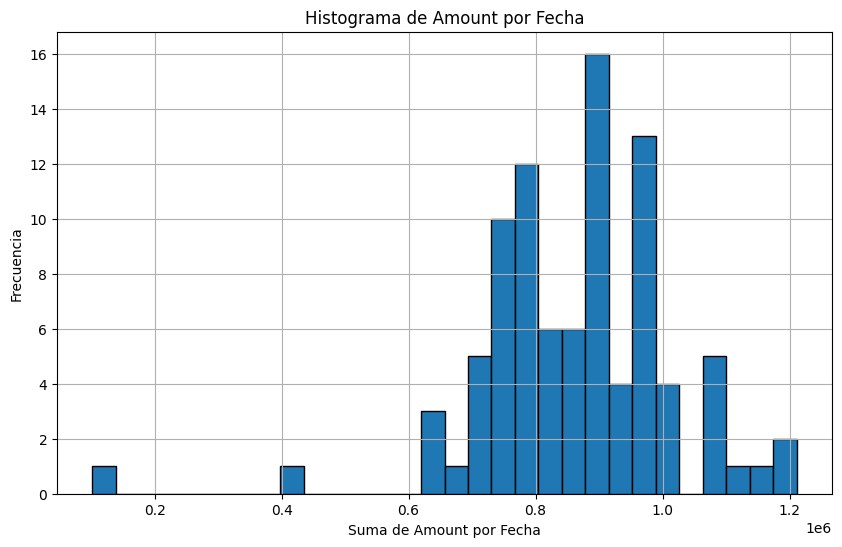

In [144]:
amount_por_fecha = df.groupby('Date')['Amount'].sum()

# Crear un histograma de 'Amount' agrupado por 'Date'
plt.figure(figsize=(10, 6))
plt.hist(amount_por_fecha, bins=30, edgecolor='black')
plt.title('Histograma de Amount por Fecha')
plt.xlabel('Suma de Amount por Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<ipython-input-145-659ceb416ddf>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


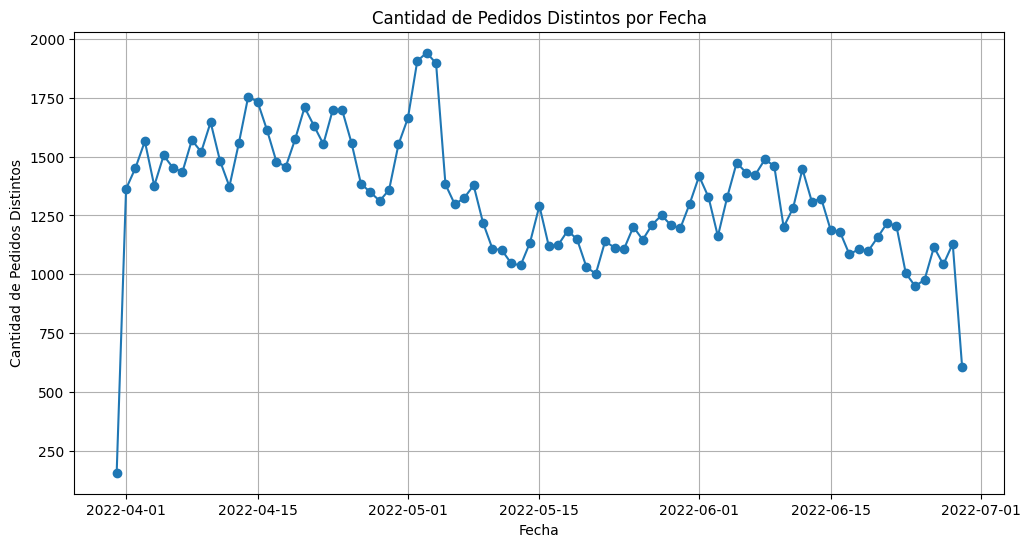

In [145]:
# paso la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Cuento la cantidad de pedidos distintos (Order ID) por fecha
pedidos_por_fecha = df.groupby('Date')['Order ID'].nunique()

# Grafico la cantidad de pedidos distintos por fecha
plt.figure(figsize=(12, 6))
plt.plot(pedidos_por_fecha.index, pedidos_por_fecha.values, marker='o', linestyle='-')
plt.title('Cantidad de Pedidos Distintos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pedidos Distintos')
plt.grid(True)
plt.show()

In [146]:
# resumen estadistico para las variables numericas
df[['Qty','Amount','ship-postal-code']].describe(percentiles=[0.25,0.9,0.95])

,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,128976.000000
mean,0.904401,610.110813,463874.404300
std,0.313368,314.069117,191481.383425
min,0.000000,0.000000,110001.000000
25%,1.000000,416.000000,382421.000000
50%,1.000000,587.000000,500033.000000
90%,1.000000,1033.000000,700075.000000
95%,1.000000,1166.500000,769004.000000
max,15.000000,8175.000000,989898.000000


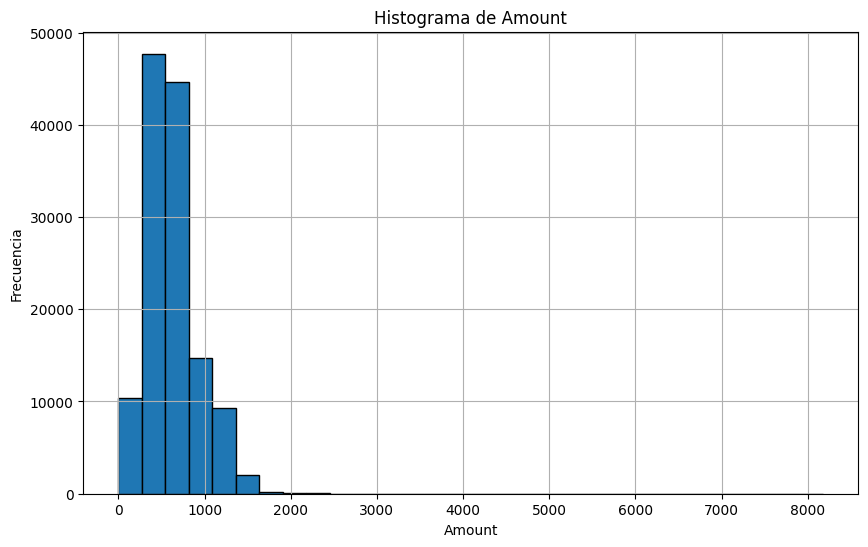

In [147]:
# Creo un histograma de la columna 'Amount'
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'].dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

conclusion: La distribución de los datos está claramente sesgada hacia la derecha. La mayoría de los valores de Amount están concentrados en la parte baja del rango, con una cola larga hacia la derecha. Esto indica que hay un número significativo de transacciones con valores bajos, y un número más pequeño de transacciones con valores altos. La mayor parte de los datos está concentrada en un rango estrecho en la parte inferior del eje de Amount. Esto sugiere que la mayoría de las transacciones tienen montos relativamente bajos.

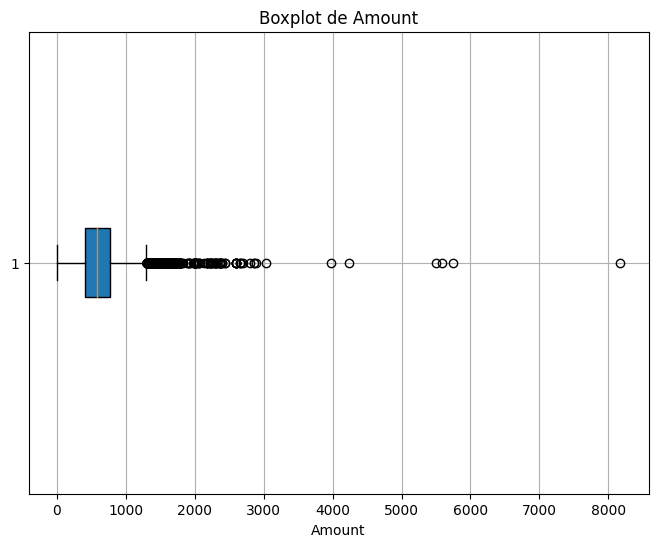

In [148]:
# Hay algunas barras aisladas hacia la derecha del histograma, lo que sugiere la presencia de outliers. Grafico un boxplot para mayor visualizacion
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot de Amount')
plt.xlabel('Amount')
plt.grid(True)
plt.show()

### conclusion: Los puntos fuera de los bigotes son los outliers, que son los valores que se desvían significativamente del resto de los datos.

In [149]:
df[df['Amount'] > 1500].shape[0]

750

In [150]:
(df[df['Amount'] > 1500].shape[0])/(df.shape[0])
# Por el momento no realizare ningun tratamiento de estos outliers.

0.005815035355414961

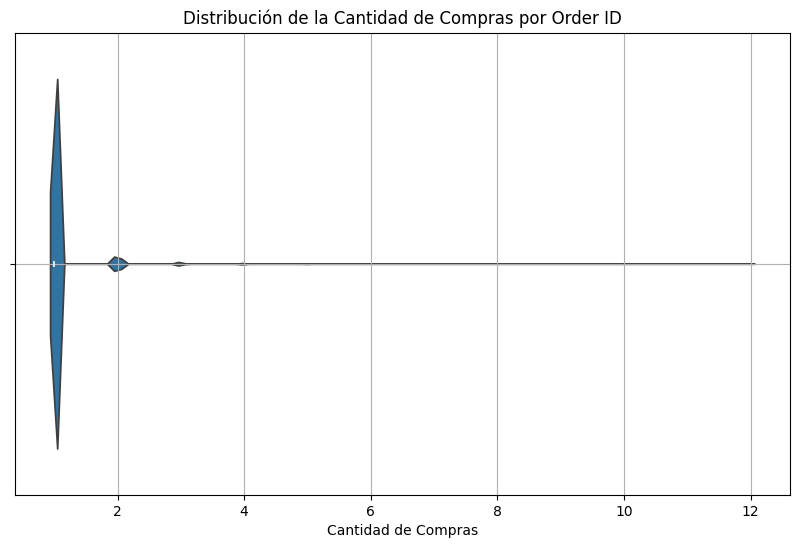

In [151]:
# cantidad de compras por Order ID

df_compras = compras_por_order_id.reset_index(name='Cantidad de Compras')

# Crear un violin plot para ver la distribución de la cantidad de compras por Order ID
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_compras['Cantidad de Compras'])
plt.title('Distribución de la Cantidad de Compras por Order ID')
plt.xlabel('Cantidad de Compras')
plt.grid(True)
plt.show()

La forma del violin plot sugiere que hay una alta densidad de Order ID con un número bajo de compras, y la densidad disminuye a medida que aumenta el número de compras. La distribución asimétrica, indica que la mayoría de los valores están agrupados en un lado del rango ( la mayoría de los Order ID tienen una cantidad específica de compras)

In [152]:
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Calculo la moda para cada columna categórica
modas_categoricas = df[columnas_categoricas].mode().iloc[0]
modas_categoricas

,0
Order ID,171-5057375-2831560
Status,Shipped
Fulfilment,Amazon
Sales Channel,Amazon.in
ship-service-level,Expedited
Category,T-shirt
Size,M
Courier Status,Shipped
ship-city,BENGALURU
ship-state,MAHARASHTRA


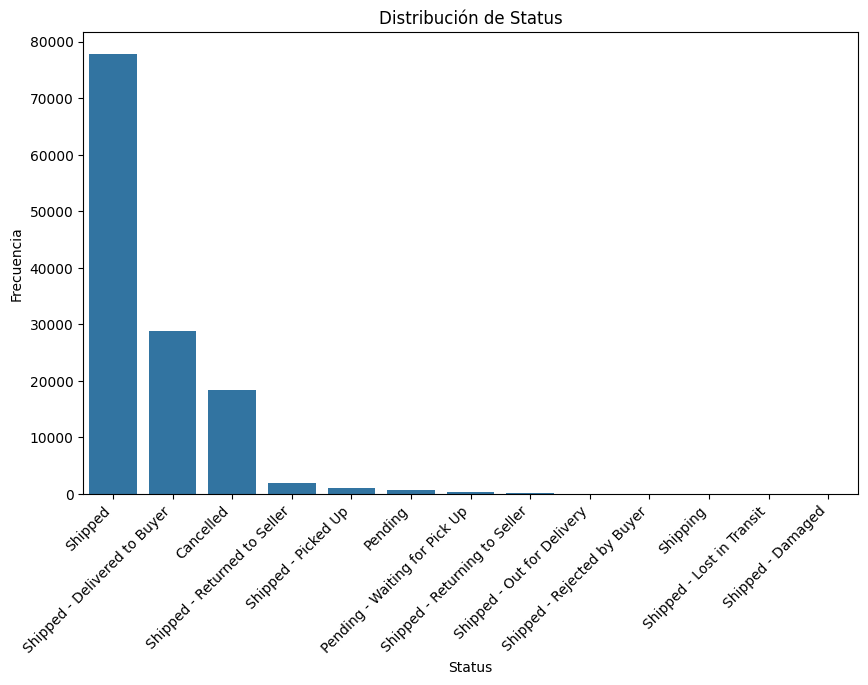

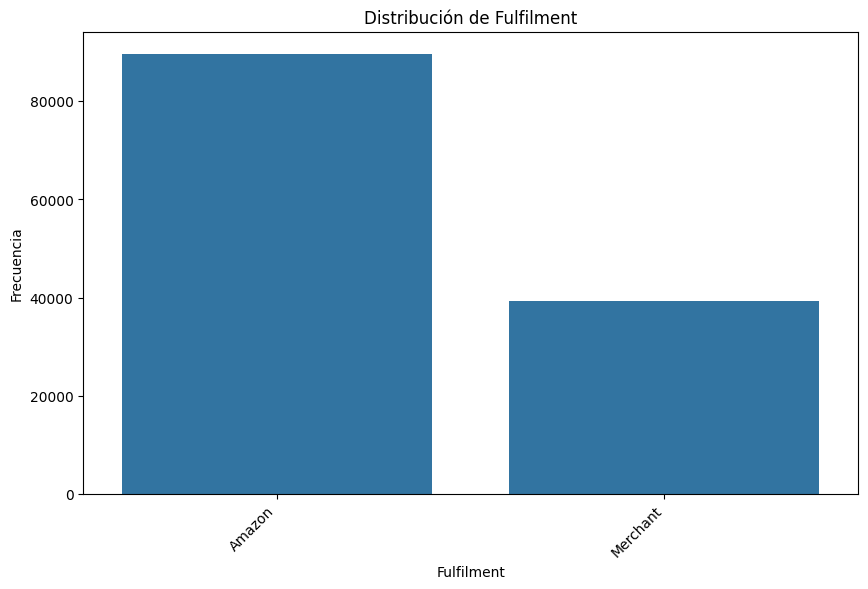

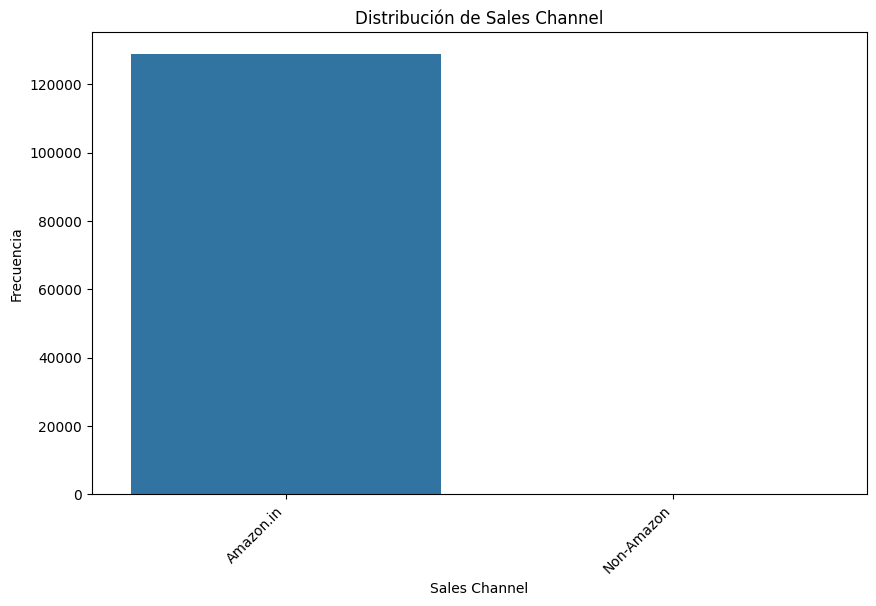

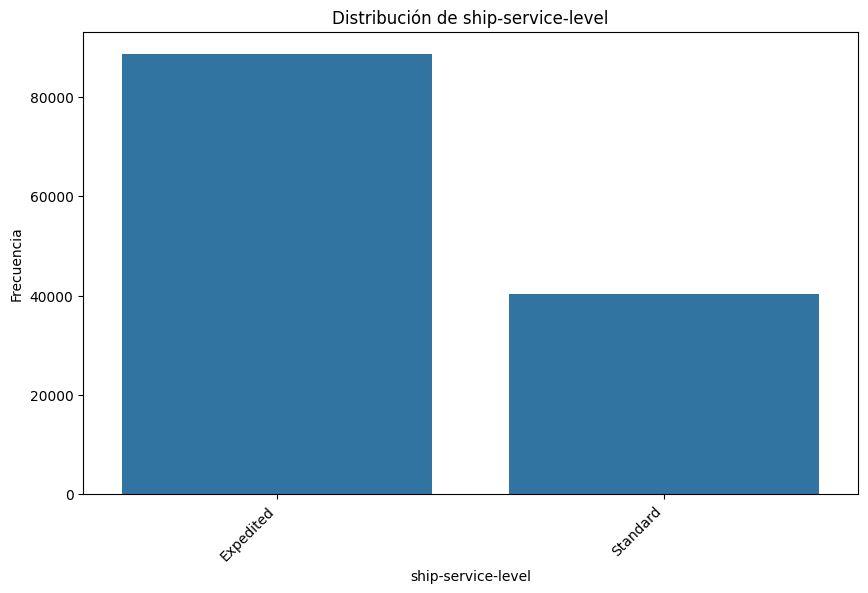

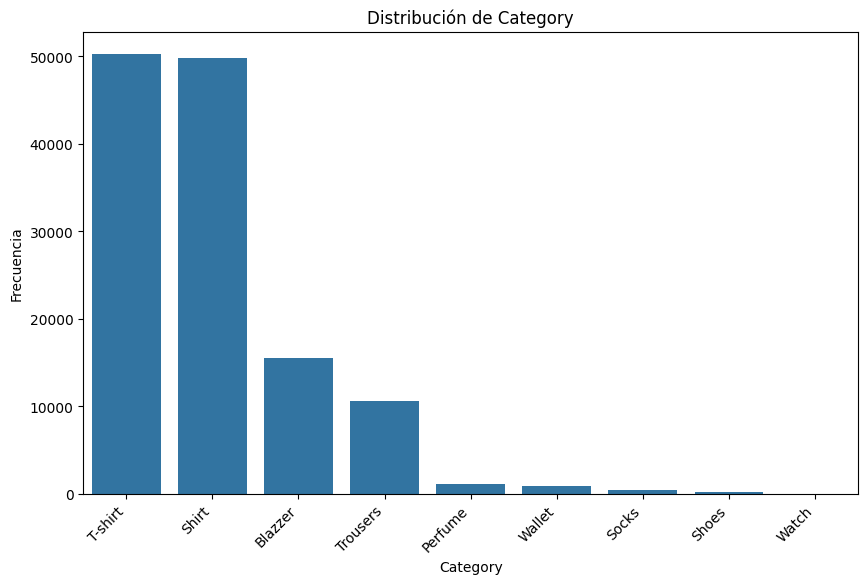

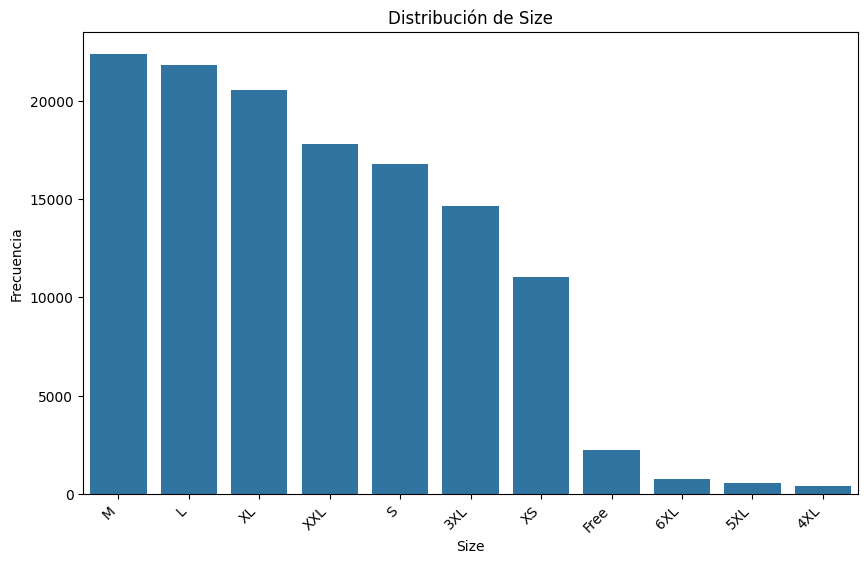

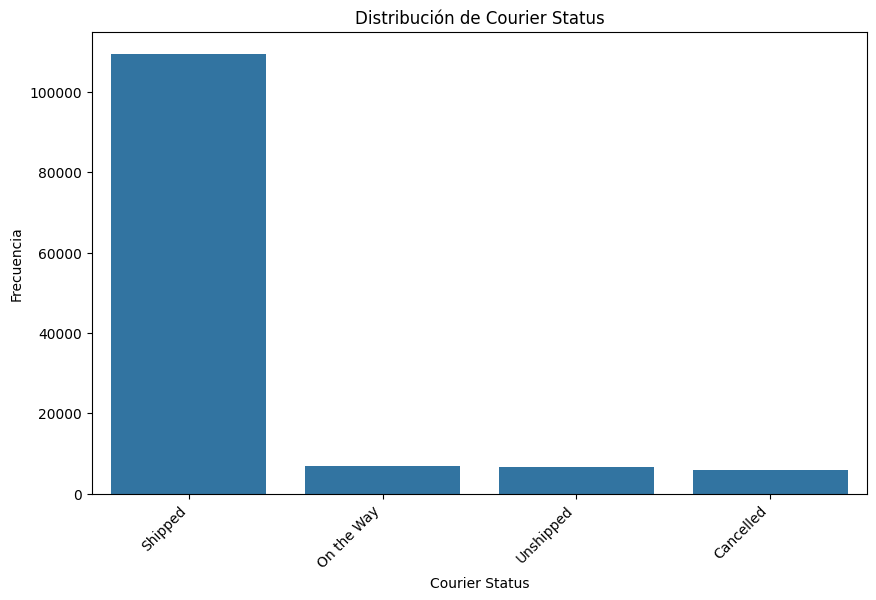

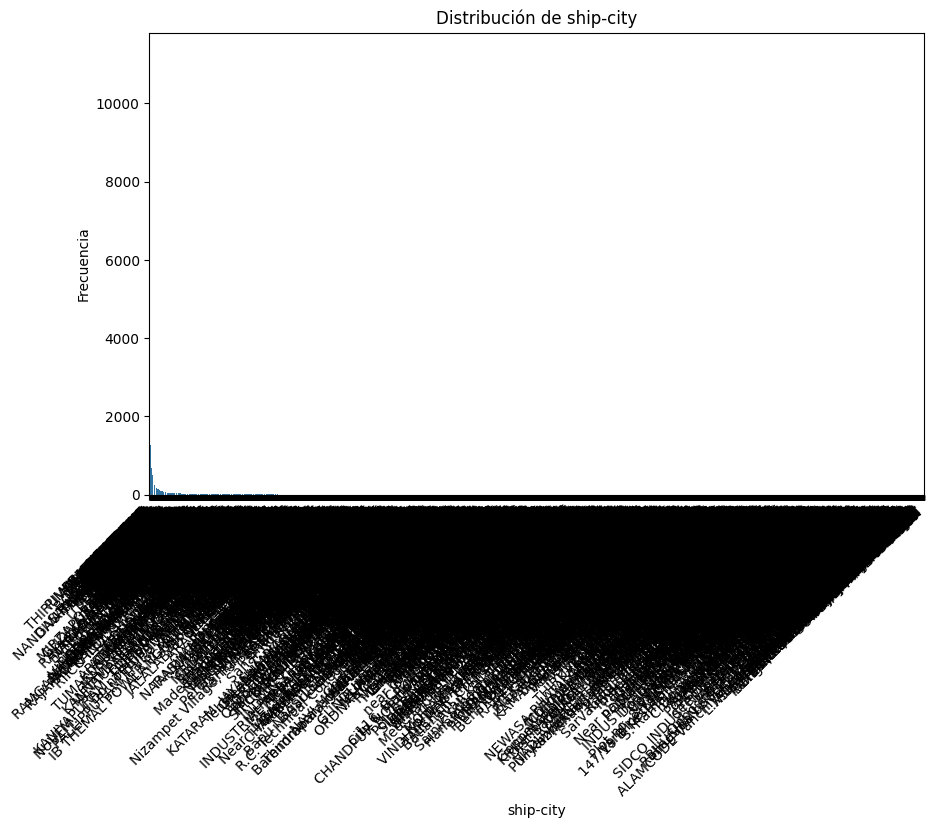

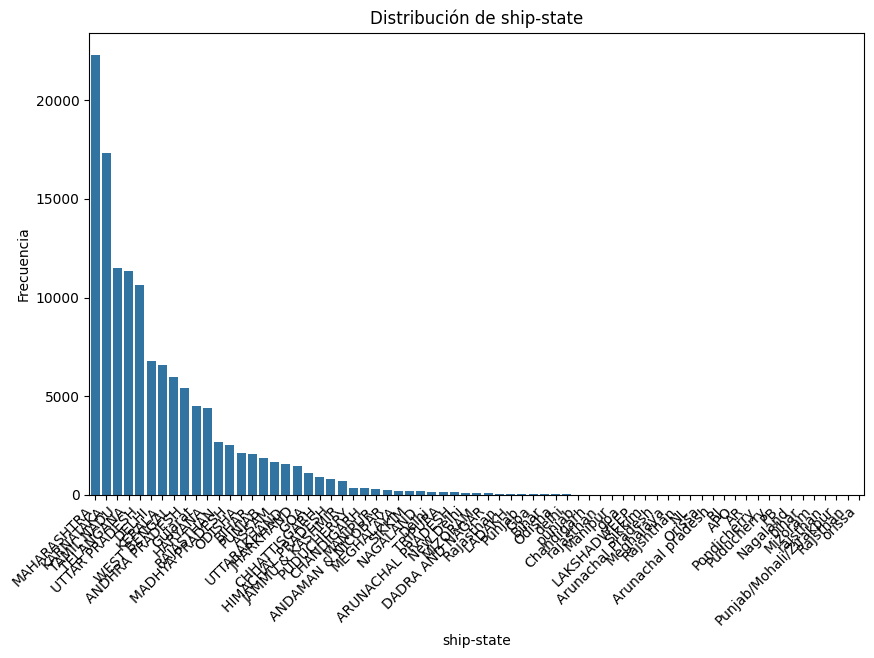

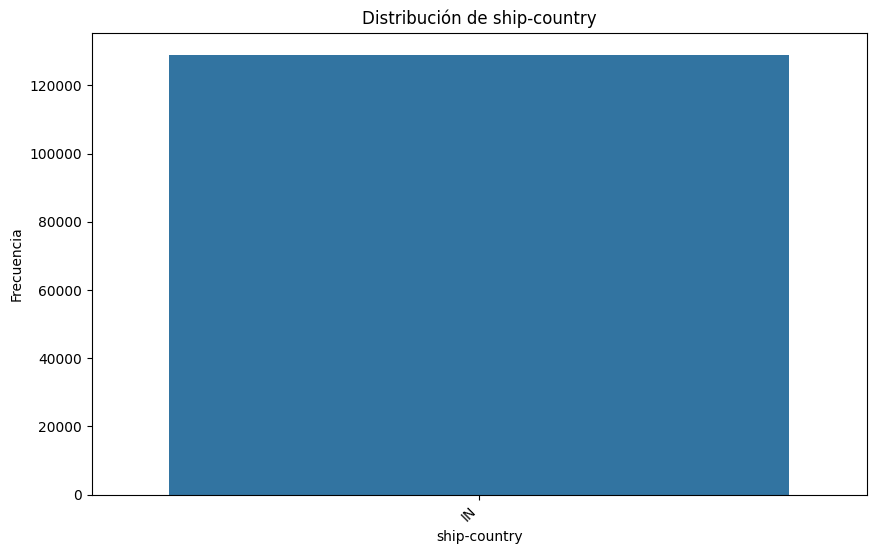

In [153]:
# Creo gráficos de distribución para cada columna categórica
for columna in columnas_categoricas:
    if columna != 'Order ID':  # Excluir 'Order ID'
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=columna, order=df[columna].value_counts().index)
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.show()

Variable: Status:

Interpretación: El gráfico muestra que la mayoría de los pedidos están en el estado "Shipped", seguido de "Cancelled" y "Returned". Esto sugiere que la operación está funcionando bien, con la mayoría de los pedidos completados con éxito. Sin embargo, la presencia de un número significativo de pedidos "Cancelled" podría indicar un problema que necesita ser investigado, como problemas con el inventario o con la satisfacción del cliente. VAMOS A BUSCAR PREDECIR LA PROBABILIDAD DE QUE UN PEDIDO SEA CANCELADO.

Variable: Category:

Interpretación: El gráfico revela que la categoría más vendida es "Electronics", seguida de "Clothing" y "Home Appliances". Esto indica que los productos electrónicos son los más populares en este dataset. Si "Home Appliances" tiene una barra significativamente más baja, podría ser un área de oportunidad para campañas de marketing o ajustes en la estrategia de productos.

Variable: Sales Channel:

Interpretación: El gráfico muestra que el canal de ventas predominante es "Online", con una pequeña fracción de ventas en "Retail". Esto podría sugerir que la estrategia de ventas está fuertemente enfocada en el comercio electrónico, y tal vez haya un potencial no explotado en la venta al por menor tradicional.

Variable: Ship Service Level:

Interpretación: El gráfico indica que el nivel de servicio de envío más utilizado es "Standard", con "Expedited" y "Priority" representando un menor porcentaje. Esto podría reflejar una preferencia del cliente por opciones de envío más económicas o que la empresa prioriza envíos estándar como parte de su estrategia de costos.

Variable: Fulfilment:

Interpretación: Si el gráfico muestra que la mayoría de los pedidos son cumplidos por "Amazon" en lugar de "Merchant", esto podría sugerir que los vendedores prefieren utilizar los servicios logísticos de Amazon, lo que podría tener implicaciones para los costos y la eficiencia.

In [154]:
#Variable: ship-country:
# No aporta variabilidad, ya que su dato es igual para todas las filas del df. Procedo a eliminarla.
df.drop(columns=['ship-country'], inplace=True)

<ipython-input-155-2295261bdf98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='viridis')


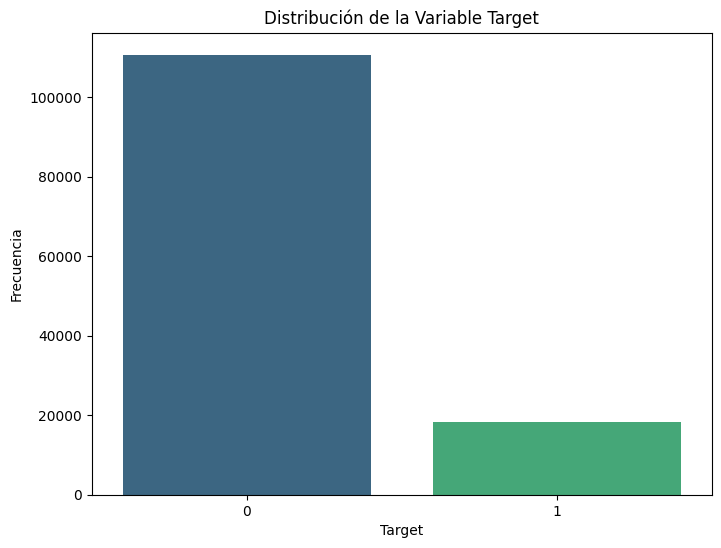

In [155]:
# ANALISIS VARIABLE TARGET
#  distribución de la variable 'target'
plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'], palette='viridis')
plt.title('Distribución de la Variable Target')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['0', '1'])
plt.show()

Desbalance de Clases: El desbalance hacia el valor 0 indica que la mayoría de las observaciones no pertenecen a la clase positiva (1). Para evitar sesgos, habra que aplicar tecnicas de balanceo de clases

In [156]:
df = df.apply(pd.to_numeric, errors='coerce')

In [157]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


   ## IQR

In [158]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

print("Primer cuartil (Q1):\n", Q1)
print("Tercer cuartil (Q3):\n", Q3)
print("Rango intercuartílico (IQR):\n", IQR)


Primer cuartil (Q1):
 index                 3.224275e+04
Order ID                       NaN
Date                  1.650413e+18
Status                         NaN
Fulfilment                     NaN
Sales Channel                  NaN
ship-service-level             NaN
Category                       NaN
Size                           NaN
Courier Status                 NaN
Qty                   1.000000e+00
Amount                4.160000e+02
ship-city             1.000000e+00
ship-state                     NaN
ship-postal-code      3.824210e+05
B2B                   0.000000e+00
New                            NaN
PendingS                       NaN
target                0.000000e+00
Name: 0.25, dtype: float64
Tercer cuartil (Q3):
 index                 9.673025e+04
Order ID                       NaN
Date                  1.654301e+18
Status                         NaN
Fulfilment                     NaN
Sales Channel                  NaN
ship-service-level             NaN
Category           

#### Busco la correlaciòn entre variables, no considero necesario generar una matriz (grafico) de correlacion

In [159]:
# correlaciones
correlaciones = df.corr()
print(correlaciones['target'].sort_values(ascending=False))

target                1.000000
ship-postal-code      0.015695
index                -0.002300
Date                 -0.008799
B2B                  -0.013806
Amount               -0.301624
Qty                  -0.774090
Order ID                   NaN
Status                     NaN
Fulfilment                 NaN
Sales Channel              NaN
ship-service-level         NaN
Category                   NaN
Size                       NaN
Courier Status             NaN
ship-city                  NaN
ship-state                 NaN
New                        NaN
PendingS                   NaN
Name: target, dtype: float64


Intepreacion: Qty y Amount son las variables más influyentes, ya que tienen las correlaciones más fuertes con la variable objetivo. En particular, Qty tiene una correlación bastante fuerte, lo que sugiere que es una variable clave para la predicción. Ejemplo de interpretacion: los pedidos con una mayor cantidad de productos tienen menos probabilidad de ser cancelados. Por el contrario, ship-postal-code, index, y B2B muestran correlaciones muy bajas, indicando que probablemente no aporten mucho al modelo predictivo